In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Data Gen

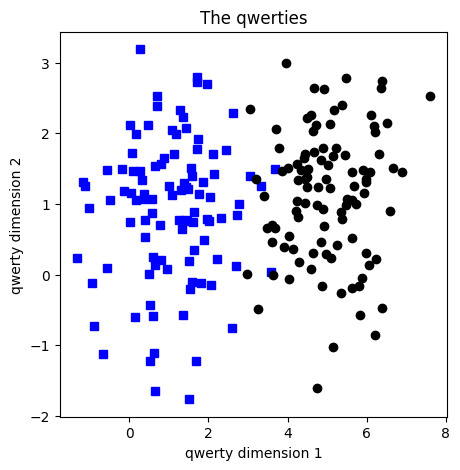

In [2]:
nPerClust = 100
blur = 1

# we pick 2 centroids of our random clusters
A = [1,1]
B = [5,1]

# We generate 100 random points around each centroid for it's x and y
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels, so just 0's and 1's in a single array
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust,1))))

# concatenate into a matrix, so x's of a hstacked with x's of b, same for y's. Then we transpose obtaining 2 kolumns 1 for x's 2 nd for y's
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


# Model

In [4]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [5]:
def createANNmodel(learningRate):
  # build the model
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,8),
      nn.ReLU(),
      nn.Linear(8,1),
      nn.Sigmoid()
  )

  learning_rate = .001

  # loss fn
  lossfun = nn.BCELoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learning_rate)

  return ANNclassify, lossfun, optimizer

# Train

In [6]:
def trainModel(ANNclassify, lossfun, optimizer):

  epochs = 500
  losses = np.zeros(epochs)

  for epoch in range(epochs):
    # forward
    yhat = ANNclassify(data)

    # losses
    loss = lossfun(yhat, labels)
    losses[epoch] = loss

    # log
    if epoch%10 == 0:
      print(f'Epoch {epoch}, Loss {loss}')

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final pred
  predictions = ANNclassify(data)
  predlabels = predictions > .5
  misclassified = np.where(predlabels != labels)[0]
  accuracy = 100 - 100*len(misclassified)/(2*nPerClust)

  return losses, predictions, accuracy, misclassified

# Single Run

In [7]:
ANNclassify, lossfun, optimizer = createANNmodel(0.01)
losses, predictions, accuracy, misclassified = trainModel(ANNclassify, lossfun, optimizer)

/tmp/ipython-input-3800407770.py:12: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  losses[epoch] = loss


Epoch 0, Loss 0.7089148759841919
Epoch 10, Loss 0.7077662944793701
Epoch 20, Loss 0.706571638584137
Epoch 30, Loss 0.7053346037864685
Epoch 40, Loss 0.7040625810623169
Epoch 50, Loss 0.7027519941329956
Epoch 60, Loss 0.7014346122741699
Epoch 70, Loss 0.7001234292984009
Epoch 80, Loss 0.6988070607185364
Epoch 90, Loss 0.6974912881851196
Epoch 100, Loss 0.6961696147918701
Epoch 110, Loss 0.6948384046554565
Epoch 120, Loss 0.6935194134712219
Epoch 130, Loss 0.6922335624694824
Epoch 140, Loss 0.690969705581665
Epoch 150, Loss 0.6897451877593994
Epoch 160, Loss 0.6885567307472229
Epoch 170, Loss 0.6873822808265686
Epoch 180, Loss 0.6862281560897827
Epoch 190, Loss 0.6850939393043518
Epoch 200, Loss 0.6839737892150879
Epoch 210, Loss 0.6828654408454895
Epoch 220, Loss 0.681776225566864
Epoch 230, Loss 0.6807212829589844
Epoch 240, Loss 0.6796883344650269
Epoch 250, Loss 0.6786676645278931
Epoch 260, Loss 0.6776645183563232
Epoch 270, Loss 0.6766728758811951
Epoch 280, Loss 0.6756923198699951

# Loss

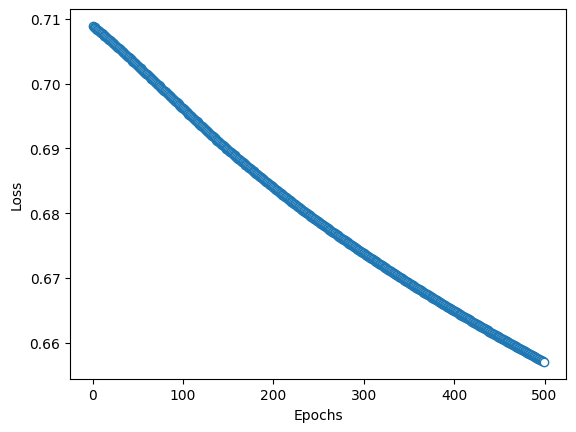

In [8]:
plt.plot(losses, 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Outcome

Text(0.5, 1.0, 'Accuracy: 50.00')

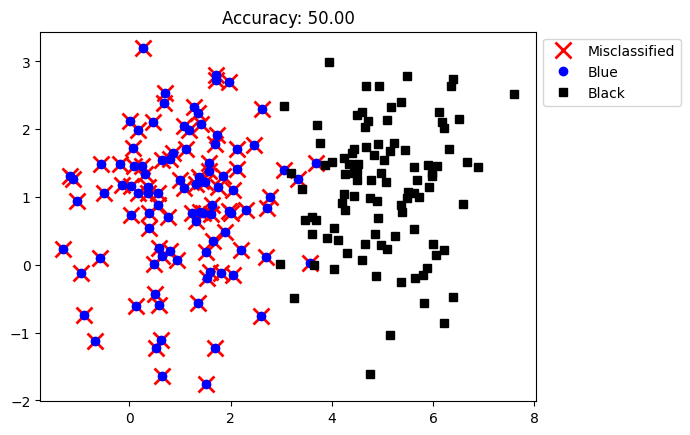

In [9]:
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=2)
plt.plot(data[np.where(labels == 0)[0],0], data[np.where(labels == 0)[0],1], 'bo')
plt.plot(data[np.where(labels == 1)[0],0], data[np.where(labels == 1)[0],1], 'ks')
plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor=(1,1))
plt.title(f'Accuracy: {accuracy:.2f}')

# Learning Rates Single Experiment

In [10]:
numepochs = 500

# the set of learning rates to test
learningRates = np.linspace(0.001, .1, 40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningRates), numepochs))

# loop through learning rates
for i, lr in enumerate(learningRates):
  ANNclassify, lossfun, optimizer = createANNmodel(lr)
  losses, predictions, totalacc, _ = trainModel(ANNclassify, lossfun, optimizer)

  # store the results
  accByLR.append(totalacc)
  allLosses[i, :] = losses

Epoch 0, Loss 0.6791927814483643
Epoch 10, Loss 0.6782772541046143
Epoch 20, Loss 0.6773430705070496
Epoch 30, Loss 0.6763837933540344
Epoch 40, Loss 0.6754029989242554
Epoch 50, Loss 0.6744059920310974
Epoch 60, Loss 0.6733807325363159
Epoch 70, Loss 0.6723109483718872
Epoch 80, Loss 0.6711980700492859
Epoch 90, Loss 0.6700317859649658
Epoch 100, Loss 0.6688464879989624
Epoch 110, Loss 0.6676551103591919
Epoch 120, Loss 0.6664540767669678
Epoch 130, Loss 0.6652700901031494
Epoch 140, Loss 0.664095938205719
Epoch 150, Loss 0.6629184484481812
Epoch 160, Loss 0.6617388725280762
Epoch 170, Loss 0.6605685949325562
Epoch 180, Loss 0.6594105362892151
Epoch 190, Loss 0.6582688093185425
Epoch 200, Loss 0.6571474671363831
Epoch 210, Loss 0.6560391187667847
Epoch 220, Loss 0.6549472808837891
Epoch 230, Loss 0.6538838744163513
Epoch 240, Loss 0.6528328061103821
Epoch 250, Loss 0.6517940759658813
Epoch 260, Loss 0.6507660746574402
Epoch 270, Loss 0.649745762348175
Epoch 280, Loss 0.648740053176879

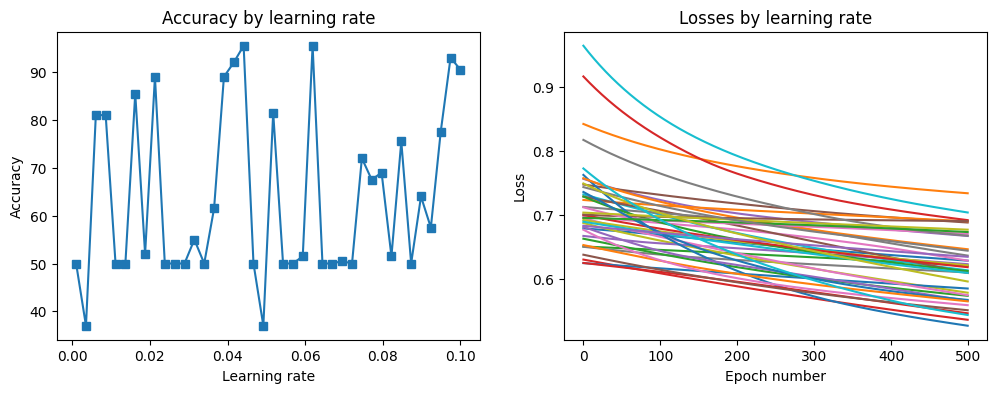

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(learningRates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

Text(0, 0.5, 'Sigmoid Output')

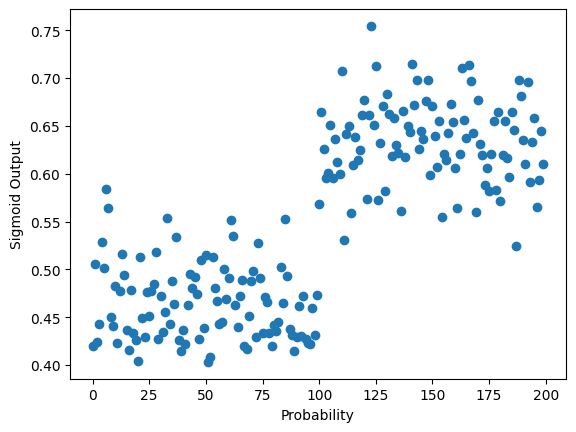

In [12]:
plt.plot(predictions.detach(), 'o')
plt.xlabel('Probability')
plt.ylabel('Sigmoid Output')

In [13]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.3500)

# Learning Rates Meta-Experiment

In [14]:
# run a meta-experiment by repeating the experiment N time for each learning rate

numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps, len(learningRates)))

# fewer epochs to reduce computation time
numepochs = 500

for expi in range(numExps):
  for i,lr in enumerate(learningRates):
    # create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc, _ = trainModel(ANNclassify, lossfun, optimizer)

    # store the results
    accMeta[expi, i] = totalacc

Streaming output truncated to the last 5000 lines.
Epoch 0, Loss 0.6732330918312073
Epoch 10, Loss 0.6710267663002014
Epoch 20, Loss 0.6688235402107239
Epoch 30, Loss 0.6666351556777954
Epoch 40, Loss 0.6644583940505981
Epoch 50, Loss 0.6623058319091797
Epoch 60, Loss 0.6601710319519043
Epoch 70, Loss 0.6580597162246704
Epoch 80, Loss 0.6559574007987976
Epoch 90, Loss 0.6538705229759216
Epoch 100, Loss 0.651804506778717
Epoch 110, Loss 0.649746835231781
Epoch 120, Loss 0.6476946473121643
Epoch 130, Loss 0.6456494331359863
Epoch 140, Loss 0.6436150074005127
Epoch 150, Loss 0.6415954828262329
Epoch 160, Loss 0.6395800113677979
Epoch 170, Loss 0.6375768184661865
Epoch 180, Loss 0.635577380657196
Epoch 190, Loss 0.633588969707489
Epoch 200, Loss 0.6316072344779968
Epoch 210, Loss 0.6296401023864746
Epoch 220, Loss 0.6276684403419495
Epoch 230, Loss 0.6257001757621765
Epoch 240, Loss 0.6237315535545349
Epoch 250, Loss 0.621772289276123
Epoch 260, Loss 0.6198216080665588
Epoch 270, Loss 0.61

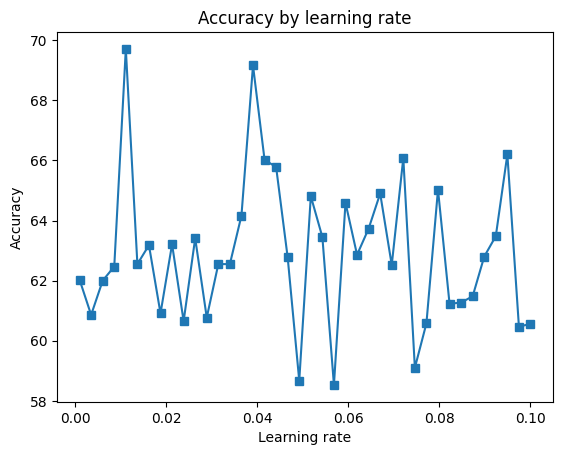

In [15]:
plt.plot(learningRates, np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

# ANN Model Experiment

Data Gen

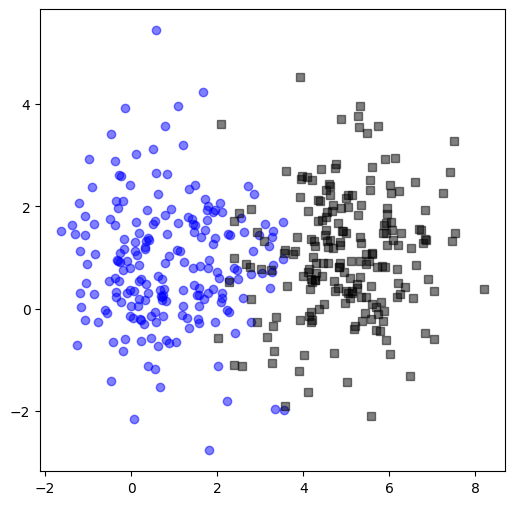

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

nPerClust = 200

A = [1,1]
B = [5,1]
blur = 1.2

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

fig = plt.figure(figsize=(6,6))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bo', alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ks', alpha=0.5)

Functions

In [17]:
lossfn = nn.BCELoss()

def model_simple():
  ann = nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  )

  return ann

def model_complex():
  ann = nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,16),
      nn.ReLU(),
      nn.Linear(16,8),
      nn.ReLU(),
      nn.Linear(8,1),
      nn.Sigmoid()
  )

  return ann

def train(data, labels, ann, epochs, lr, nPerClust, lossfn, verbose=True):
  losses = np.zeros(epochs)
  optim = torch.optim.SGD(ann.parameters(), lr = lr)

  for epoch in range(epochs):
    yhat = ann(data)

    loss = lossfn(yhat, labels)
    losses[epoch] = loss

    if verbose and epoch%10==0:
      print(f'Epoch: {epoch}, Loss: {loss}')

    optim.zero_grad()
    loss.backward()
    optim.step()

  predictions = ann(data)
  predictions_labels = predictions > 0.5
  misclassified = np.where(predictions_labels != labels)
  accuracy = 100 - 100*len(misclassified)/(2*nPerClust)

  return losses, accuracy

Train

In [18]:
ann_simple = model_simple()
losses_simple, acc_simple = train(data,
                                  labels,
                                  ann_simple,
                                  epochs=1000,
                                  lr=0.001,
                                  nPerClust=100,
                                  lossfn=nn.BCELoss(),
                                  verbose=False)
acc_simple

99.0

In [19]:
ann_complex = model_complex()
losses_complex, acc_complex = train(data,
                                    labels,
                                    ann_complex,
                                    epochs=1000,
                                    lr=0.001,
                                    nPerClust=100,
                                    lossfn=nn.BCELoss(),
                                    verbose=False)

acc_complex

99.0

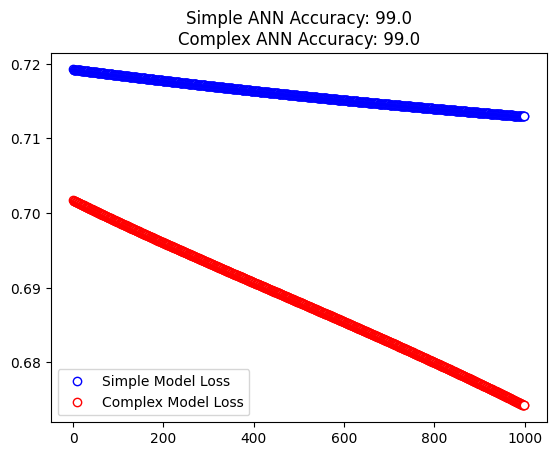

In [20]:
plt.plot(losses_simple, 'bo', markerfacecolor='w', label='Simple Model Loss')
plt.plot(losses_complex, 'ro', markerfacecolor='w', label='Complex Model Loss')
plt.title(f'Simple ANN Accuracy: {acc_simple}\nComplex ANN Accuracy: {acc_complex}')
plt.legend()
plt.show()

# Linear vs Non-Linear Model Experiment

In [21]:
def model_nonlin():
  ann = nn.Sequential(
      nn.Linear(2,1),
      # nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  )

  return ann

def model_lin():
  ann = nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  )

  return ann

ann_nonlin = model_nonlin()
losses_nonlin, acc_nonlin = train(data,
                                  labels,
                                  ann_nonlin,
                                  epochs=1000,
                                  lr=0.001,
                                  nPerClust=100,
                                  lossfn=nn.BCELoss(),
                                  verbose=False)

ann_lin = model_lin()
losses_lin, acc_lin = train(data,
                            labels,
                            ann_lin,
                            epochs=1000,
                            lr=0.001,
                            nPerClust=100,
                            lossfn=nn.BCELoss(),
                            verbose=False)

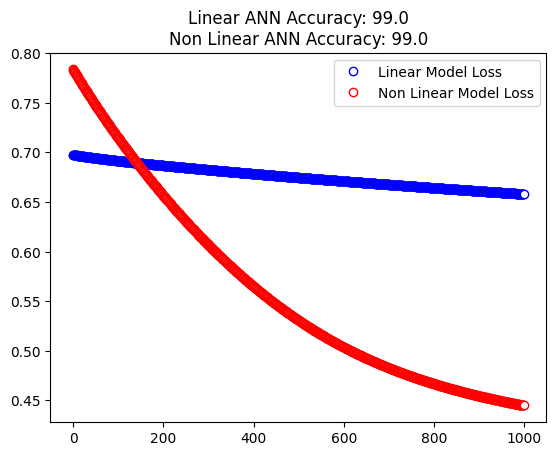

In [22]:
plt.plot(losses_lin, 'bo', markerfacecolor='w', label='Linear Model Loss')
plt.plot(losses_nonlin, 'ro', markerfacecolor='w', label='Non Linear Model Loss')
plt.title(f'Linear ANN Accuracy: {acc_lin}\nNon Linear ANN Accuracy: {acc_nonlin}')
plt.legend()
plt.show()